<a href="https://colab.research.google.com/github/Kankenny/learning-python/blob/main/DataMiningProject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pima Indians Diabetes Database

## Pregnancies, Glucosse, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree, Age, Outcome (Target Class)

###1.) Bin all continuous attributes to make them categorical
###2.a) Use a decision tree classification algorithm such as: information gain, gini-idx
###2.b) Use naive bayes classification
###3.) Performance Metrics

## Pregnancies (removed as it is inconclusive), skin thickness (binary split on actual mean 20), insulin (binary split 166 based on normal level), age (bin every 10), diabetes pedigree (binary split on mean .47)

# Mushroom Classification

###1.) Remove stalk-root (incomplete)
###2.) Decision Tree then construct indirect rule-based classification
###3.) Performance Metrics





#Packages/Modules

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Pima Indians Diabetes Database

In [180]:
df = pd.read_csv('diabetes.csv')    

###0.a.) Dataset Exploration


Data set: 


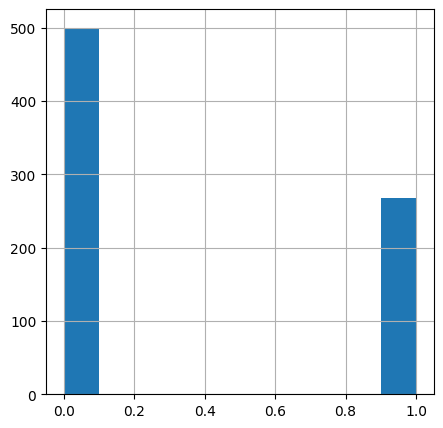

In [181]:
df['Outcome'].hist(figsize=(5,5))
print('Data set: ')

###0.b.) Dataset Attributes Exploration


Attributes Properties: 


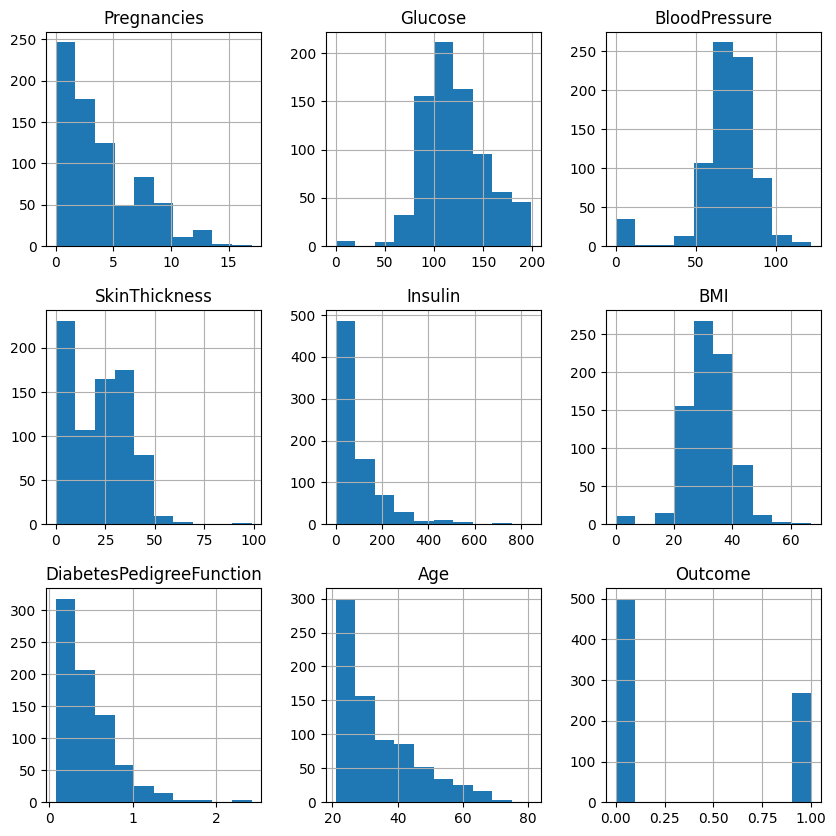

Attributes Metrics: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [182]:
df.hist(figsize=(10, 10))

print('Attributes Properties: ')
plt.show()

print('Attributes Metrics: ')
print(df.describe())

### 1.a.) Preprocessing: Make Continuous Attrs. into Categorical with Binning and Binary Split

##### Normally Distributed Attrs: Glucose, BloodPresssure, BMI
##### Rest: Pregnancies, Skin Thickness, Insulin, Diabetes Pedigree, Age

In [183]:
# Normally Distributed Attrs:
  # Glucose
df['Glucose'] = pd.qcut(df['Glucose'], q = 3, labels=['0', '1', '2'])
  # Blood Pressure
df['BloodPressure'] = pd.qcut(df['BloodPressure'], q = 3, labels=['0', '1', '2'])
  # BMI
df['BMI'] = pd.qcut(df['BMI'], q = 3, labels=['0', '1', '2']) 

# Rest:
  # Pregnancies
pregnancy_bins = [0, 4, 18]
pregnancy_labels = ['0', '1']
df['Pregnancies'] = pd.cut(df['Pregnancies'], bins = pregnancy_bins, labels = pregnancy_labels, include_lowest=True)
  # SkinThickness
skin_thickness_bins = [0, 20, 200] 
skin_thickness_labels = ['0', '1']
df['SkinThickness'] = pd.cut(df['SkinThickness'], bins = skin_thickness_bins, labels = skin_thickness_labels, include_lowest=True)
  # Insulin
insulin_bins = [0, 80, 1000]
insulin_labels = ['0', '1']
df['Insulin'] = pd.cut(df['Insulin'], bins = insulin_bins, labels = insulin_labels, include_lowest=True)
  # DiabetesPedigreeFunction
dpf_bins = [0, .47, 3]
dpf_labels = ['0', '1']
df['DiabetesPedigreeFunction'] = pd.cut(df['DiabetesPedigreeFunction'], bins = dpf_bins, labels = dpf_labels)
  # Age
age_bins = range(20, 91, 10)
age_labels = ['0', '1', '2', '3', '4', '5', '6']
df['Age'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

###1.b.) Split Dataset into Training and Testing Sets via LOOCV 

In [184]:
test_attr = df.drop("Outcome", axis = 1)
target_attr = df["Outcome"]

loo = LeaveOneOut()

### 2.a) Classification: Information Gain & Gini Index

In [185]:
sig_accuracies = []
sig_sensitivities = []

gi_accuracies = []
gi_sensitivities = []

for train_idx, test_idx in loo.split(test_attr):
    test_attr_train, test_attr_test = test_attr.iloc[train_idx], test_attr.iloc[test_idx]
    target_attr_train, target_attr_test = target_attr.iloc[train_idx], target_attr.iloc[test_idx]

    sig_classifier = DecisionTreeClassifier(criterion='entropy')
    sig_classifier.fit(test_attr_train, target_attr_train)
    sig_predictions = sig_classifier.predict(test_attr_test)

    sig_accuracy = accuracy_score(target_attr_test, sig_predictions)
    sig_sensitivity = recall_score(target_attr_test, sig_predictions, zero_division=1.0)

    sig_accuracies.append(sig_accuracy)
    sig_sensitivities.append(sig_sensitivity)

for train_idx, test_idx in loo.split(test_attr):
    test_attr_train, test_attr_test = test_attr.iloc[train_idx], test_attr.iloc[test_idx]
    target_attr_train, target_attr_test = target_attr.iloc[train_idx], target_attr.iloc[test_idx]

    gi_classifier = DecisionTreeClassifier(criterion='gini')
    gi_classifier.fit(test_attr_train, target_attr_train)
    gi_predictions = gi_classifier.predict(test_attr_test)

    gi_accuracy = accuracy_score(target_attr_test, gi_predictions)
    gi_sensitivity = recall_score(target_attr_test, gi_predictions, zero_division=1.0)

    gi_accuracies.append(gi_accuracy)
    gi_sensitivities.append(gi_sensitivity)

###3.a.) Performance Metrics: Shannon Information Gain


In [186]:
sig_mean_accuracy = sum(sig_accuracies) / len(sig_accuracies)
sig_mean_sensitivity = sum(sig_sensitivities) / len(sig_sensitivities)

print(f'Shannon Info Gain Accuracy: {sig_mean_accuracy}', f'\nShannon Info Gain Sensitivity: {sig_mean_sensitivity}')

Shannon Info Gain Accuracy: 0.6705729166666666 
Shannon Info Gain Sensitivity: 0.80859375


###3.b.) Performance Metrics: Gini Index


In [187]:
gi_mean_accuracy = sum(gi_accuracies) / len(gi_accuracies)
gi_mean_sensitivity = sum(gi_sensitivities) / len(gi_sensitivities)

print(f'Gini Index Accuracy: {gi_mean_accuracy}', f'\nGini Index Sensitivity: {gi_mean_sensitivity}')

Gini Index Accuracy: 0.6731770833333334 
Gini Index Sensitivity: 0.8151041666666666
